In [1]:
# Ecometricx missing value imputation test

# The data in imputation_test.csv consists of data on an households' electricity consumption.

#The variables are as follows:
#- hh-id: unique household id
#- year: 2010 and 2011
#- month: 4-8
#- zipcode: anonymized zipcode in which home is located

#- mozip: location variable derived from the interaction of zipcode with year and month. proxies for local humidity/temperature
#- lusage: log(kwh) log of monthly electricity consumption

#- lusage1-6: log(kwh) for April - September of 2009 (ie pre-sample period)

#- children: household has children

#- hhsize2-5plus: household size

#- income2-9: income categories <$20k, $20-30k, $30-40k, $40-50k, $50-75k, $75-100k, $100-125k, >$125k

#- owner: resident owns home

#Note: 
#household electricity usage is based on billing records
#household demographics were purchased from a third party data aggregator

# Import packages and load data

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("imputation_test.csv")
print(df.shape)
df.head()

(318240, 28)


,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
0,3,2010,4,53.0,540.0,6.322805,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
1,3,2010,5,53.0,541.0,6.510683,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
2,3,2010,6,53.0,542.0,6.696693,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
3,3,2010,7,53.0,543.0,6.967286,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,3,2010,8,53.0,544.0,6.966908,6.505642,6.388161,6.207919,6.439571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN


# Overview with pandas profiling

    Firstly, I wanted to have an overview look of the dataset and for this, I used pandas profiling, and saved the results in HTML file. From that file, I can visualise the missing values, understand the correlations between features, visualise histograms, and understand which methods of the imputation techniques I can apply.

In [5]:
# Dataset overview
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("report_dataset_imputation.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Jumanazar\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Calculate the missing values percentages
df.isnull().mean()

hh_id          0.000000
year           0.000000
month          0.000000
zipcode        0.006756
mozip          0.006756
lusage         0.000000
luse1          0.048454
luse2          0.030889
luse3          0.027998
luse4          0.028092
luse5          0.028092
luse6          0.027684
children       0.006756
hhsize2        0.000000
hhsize3        0.000000
hhsize4        0.000000
hhsize5        0.000000
hhsize5plus    0.000000
income2        0.006756
income3        0.006756
income4        0.006756
income5        0.006756
income6        0.006756
income7        0.006756
income8        0.006756
income9        0.006756
owner          0.006756
size           0.294463
dtype: float64

In [7]:
# check if the ids are unique
df['hh_id'].nunique()

31824

In [8]:
# correlations between variables
corr = df.corr('pearson')
corr

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income2,income3,income4,income5,income6,income7,income8,income9,owner,size
hh_id,1.000000e+00,-8.096362e-12,1.416903e-14,-3.926547e-05,-0.000249,0.007316,1.466202e-03,6.741835e-03,9.193623e-03,1.080643e-02,...,7.403105e-03,-3.201256e-04,-8.054075e-03,9.262392e-03,-9.858101e-04,-1.704401e-03,-1.941369e-03,-2.637989e-03,-2.518434e-03,-3.855629e-03
year,-8.096362e-12,1.000000e+00,-1.589058e-16,-9.940879e-14,0.012498,-0.022800,1.010018e-13,5.946854e-14,5.793837e-14,7.993423e-14,...,1.320123e-14,-4.238367e-14,-3.325745e-14,-1.680649e-13,2.878871e-14,1.099767e-13,-8.282166e-15,4.626094e-14,2.398381e-14,4.071065e-14
month,1.416903e-14,-1.589058e-16,1.000000e+00,-3.368681e-17,0.007070,0.264100,1.645455e-16,2.757653e-16,2.858343e-16,3.140293e-16,...,9.938375e-17,-9.185726e-17,-9.615017e-17,7.078144e-17,6.823257e-17,3.232678e-17,-3.474918e-17,-1.143170e-16,-4.054300e-17,-2.671050e-17
zipcode,-3.926547e-05,-9.940879e-14,-3.368681e-17,1.000000e+00,0.999227,-0.033541,-2.321558e-02,-2.429908e-02,-4.499815e-02,-4.307740e-02,...,2.763673e-02,5.237893e-02,2.725339e-02,3.740067e-03,-5.498048e-02,-6.377391e-02,-8.707307e-02,-4.991043e-02,-1.192151e-01,3.080062e-02
mozip,-2.491371e-04,1.249810e-02,7.069992e-03,9.992270e-01,1.000000,-0.031990,-2.210755e-02,-2.360514e-02,-4.432835e-02,-4.312520e-02,...,2.731798e-02,5.172483e-02,2.673404e-02,4.188525e-03,-5.450881e-02,-6.262758e-02,-8.568302e-02,-4.997136e-02,-1.179677e-01,3.104981e-02
lusage,7.316192e-03,-2.280021e-02,2.641002e-01,-3.354137e-02,-0.031990,1.000000,7.295517e-01,7.729593e-01,7.902657e-01,8.034931e-01,...,-8.228595e-02,-7.797911e-02,-7.372370e-02,-2.942954e-02,5.378022e-02,1.208150e-01,9.571937e-02,9.057620e-02,7.416443e-02,-1.148707e-01
luse1,1.466202e-03,1.010018e-13,1.645455e-16,-2.321558e-02,-0.022108,0.729552,1.000000e+00,9.383200e-01,8.678023e-01,7.973186e-01,...,-7.480088e-02,-7.699511e-02,-7.292703e-02,-2.117542e-02,4.849697e-02,1.147691e-01,8.739140e-02,8.473154e-02,7.425193e-02,1.037695e-01
luse2,6.741835e-03,5.946854e-14,2.757653e-16,-2.429908e-02,-0.023605,0.772959,9.383200e-01,1.000000e+00,9.589098e-01,8.900315e-01,...,-8.596578e-02,-8.392245e-02,-7.961722e-02,-2.483696e-02,5.004344e-02,1.271735e-01,1.028154e-01,9.826295e-02,7.992501e-02,-3.647484e-02
luse3,9.193623e-03,5.793837e-14,2.858343e-16,-4.499815e-02,-0.044328,0.790266,8.678023e-01,9.589098e-01,1.000000e+00,9.551858e-01,...,-9.210629e-02,-9.134598e-02,-8.216572e-02,-2.886928e-02,5.860287e-02,1.349199e-01,1.113132e-01,1.050843e-01,8.982649e-02,-1.917896e-01
luse4,1.080643e-02,7.993423e-14,3.140293e-16,-4.307740e-02,-0.043125,0.803493,7.973186e-01,8.900315e-01,9.551858e-01,1.000000e+00,...,-9.533970e-02,-9.226731e-02,-8.138092e-02,-2.630384e-02,6.395023e-02,1.414881e-01,1.103214e-01,1.048509e-01,1.043380e-01,-2.414085e-01


# Zipcode 
The missing values from the zipcode columns seem to be the system error while collection of the data.  Because, from my observations, values for the zipcode vary between 1 and 76, and only 72 is missing. So, I used replaced missing values with 72.
    Also, values for the mozip, luse and owner columns are missing, when zipcode is not available

In [8]:
print(set(df['zipcode'].unique()))

{nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 76.0}


##### Check if the zipcode is unique for each house. To exclude the possibility of zipcode to be completed in one month and missing in another

In [9]:
[
    key
    for key, value in df.groupby('hh_id')['zipcode'].nunique().to_dict().items()
    if value > 1
]

[]

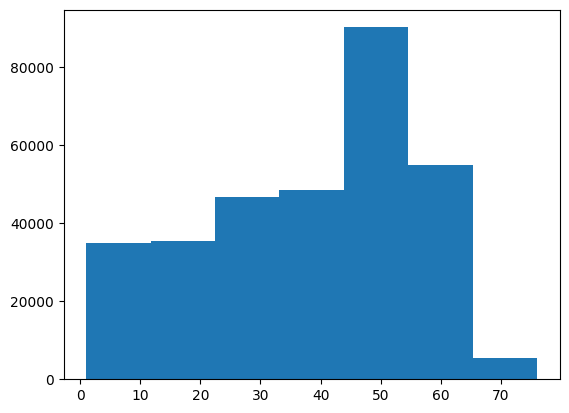

In [10]:
plt.hist(df['zipcode'], bins =7)
plt.show()

In [11]:
# replace the missing values for the zipcode

df['zipcode'].fillna(72, inplace=True)
df['zipcode'].isnull().mean()

0.0

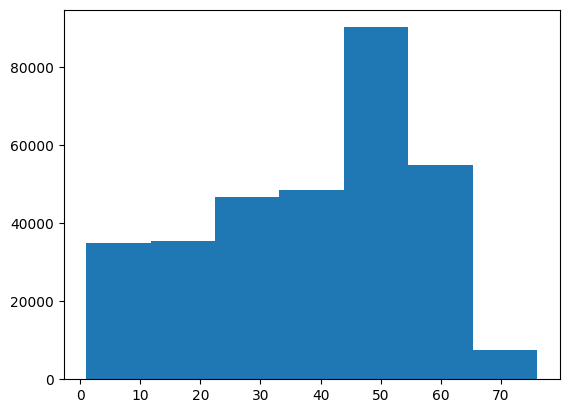

In [12]:
plt.hist(df['zipcode'], bins =7)
plt.show()

# Mozip 
It's a variable derived from the interaction of the zipcode, year, and month variables. I tried to understand the calculation logic, but didn't figure it out. So, I used approximative logic, which will follow the pattern of the mozips generation. Also, zipcode & mozip are very correlated, so it can be eliminated in the modeling

In [13]:
# estimated mozip calculation
def mozip_calculation(zipcode, year, month):
    ten = 0 if year == 2010 else 1
    mozip = zipcode*10 + ten + month + 1
    return mozip

In [14]:
for zipcode in set(df.zipcode.unique()):
    print(
        zipcode,
        df[(df['zipcode'] == zipcode) & (df["year"] == 2010) & (df["month"] == 4)].mozip.unique(),
    )

1.0 [6.]
2.0 [16.]
3.0 [26.]
4.0 [36.]
5.0 [46.]
6.0 [56.]
7.0 [66.]
8.0 [76.]
9.0 [86.]
10.0 [96.]
11.0 [106.]
12.0 [116.]
13.0 [126.]
14.0 [136.]
15.0 [155.]
16.0 [165.]
17.0 [175.]
18.0 [185.]
19.0 [195.]
20.0 [205.]
21.0 [215.]
22.0 [225.]
23.0 [235.]
24.0 [245.]
25.0 [255.]
26.0 [265.]
27.0 [275.]
28.0 [285.]
29.0 [295.]
30.0 [305.]
31.0 [315.]
32.0 [325.]
33.0 [335.]
34.0 [345.]
35.0 [355.]
36.0 [365.]
37.0 [375.]
38.0 [385.]
39.0 [395.]
40.0 [405.]
41.0 [415.]
42.0 [425.]
43.0 [435.]
44.0 [445.]
45.0 [460.]
46.0 [470.]
47.0 [480.]
48.0 [490.]
49.0 [500.]
50.0 [510.]
51.0 [520.]
52.0 [530.]
53.0 [540.]
54.0 [551.]
55.0 [561.]
56.0 [571.]
57.0 [581.]
58.0 [591.]
59.0 [601.]
60.0 [611.]
61.0 [621.]
62.0 [631.]
63.0 [646.]
64.0 [656.]
65.0 [666.]
66.0 [685.]
67.0 [699.]
68.0 [709.]
69.0 [719.]
70.0 [735.]
71.0 [753.]
72.0 [nan]
73.0 [789.]
74.0 [812.]
75.0 [822.]
76.0 [832.]


In [15]:
df[["hh_id", "year", "month", "zipcode", "mozip"]]

,hh_id,year,month,zipcode,mozip
0,3,2010,4,53.0,540.0
1,3,2010,5,53.0,541.0
2,3,2010,6,53.0,542.0
3,3,2010,7,53.0,543.0
4,3,2010,8,53.0,544.0
...,...,...,...,...,...
318235,47356,2011,4,50.0,515.0
318236,47356,2011,5,50.0,516.0
318237,47356,2011,6,50.0,517.0
318238,47356,2011,7,50.0,518.0


In [16]:
df["calculated_mozip"] = None
df["calculated_mozip"] = df.apply(lambda x: mozip_calculation(x.zipcode, x.year, x.month), axis=1)
df.mozip.fillna(df.calculated_mozip, inplace=True)
df.mozip.isna().sum()

0

# Children

For the children column I used the mode() value imputation 

In [17]:
df['children'].isnull().mean()

0.006755907491201609

(array([220120.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  95970.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

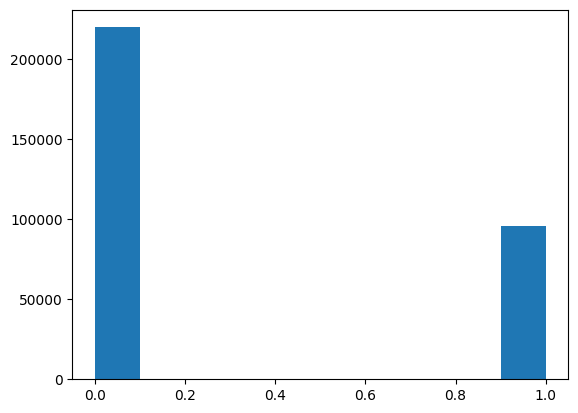

In [18]:
plt.hist(df['children'])

In [19]:
df['children'].mode()

0    0.0
Name: children, dtype: float64

0.0

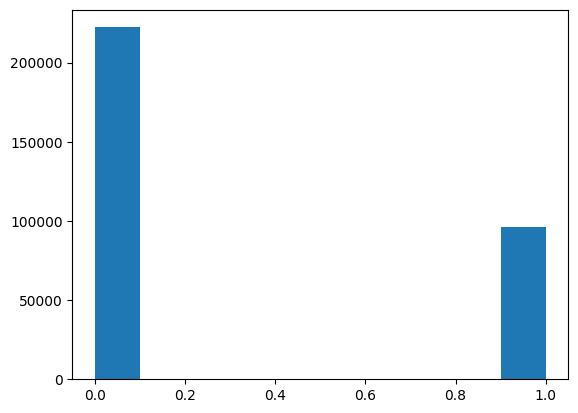

In [20]:
df['children'].fillna(0, inplace = True)
plt.hist(df['children'])
df['children'].isnull().mean()

# Owner 
Same method applied for the owner column

In [21]:
df[df['owner'].isna()].head()

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income3,income4,income5,income6,income7,income8,income9,owner,size,calculated_mozip
1420,206,2010,4,72.0,725.0,6.588937,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0
1421,206,2010,5,72.0,726.0,6.846043,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0
1422,206,2010,6,72.0,727.0,7.056111,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.0
1423,206,2010,7,72.0,728.0,7.404867,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,728.0
1424,206,2010,8,72.0,729.0,7.499781,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729.0


In [22]:
df[df['owner'].isna()].head()

,hh_id,year,month,zipcode,mozip,lusage,luse1,luse2,luse3,luse4,...,income3,income4,income5,income6,income7,income8,income9,owner,size,calculated_mozip
1420,206,2010,4,72.0,725.0,6.588937,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0
1421,206,2010,5,72.0,726.0,6.846043,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.0
1422,206,2010,6,72.0,727.0,7.056111,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.0
1423,206,2010,7,72.0,728.0,7.404867,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,728.0
1424,206,2010,8,72.0,729.0,7.499781,7.203533,6.819866,6.73761,7.186647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729.0


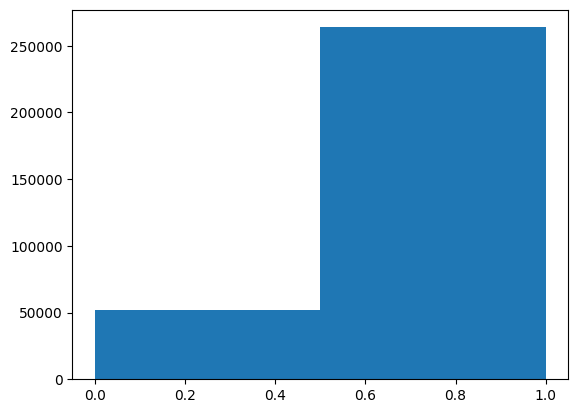

In [23]:
x = df['owner']

plt.hist(x, bins = 2)
plt.show()

In [24]:
mode = df['owner'].mode()
df['owner'].fillna(1, inplace = True)
df['owner'].isna().mean()

0.0

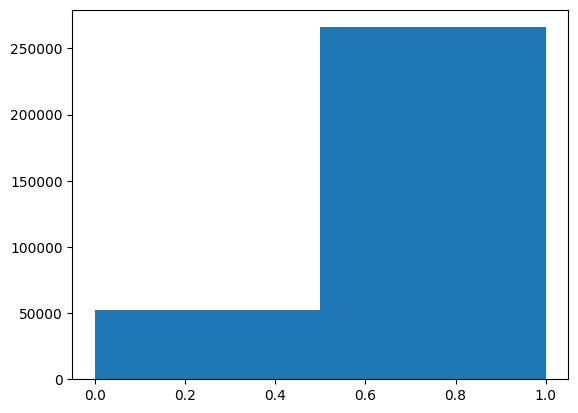

In [25]:
x = df['owner']

plt.hist(x, bins = 2)
plt.show()

# Luse

Luse columns have continious values and normal distribution, so the mean() value imputation method can be used

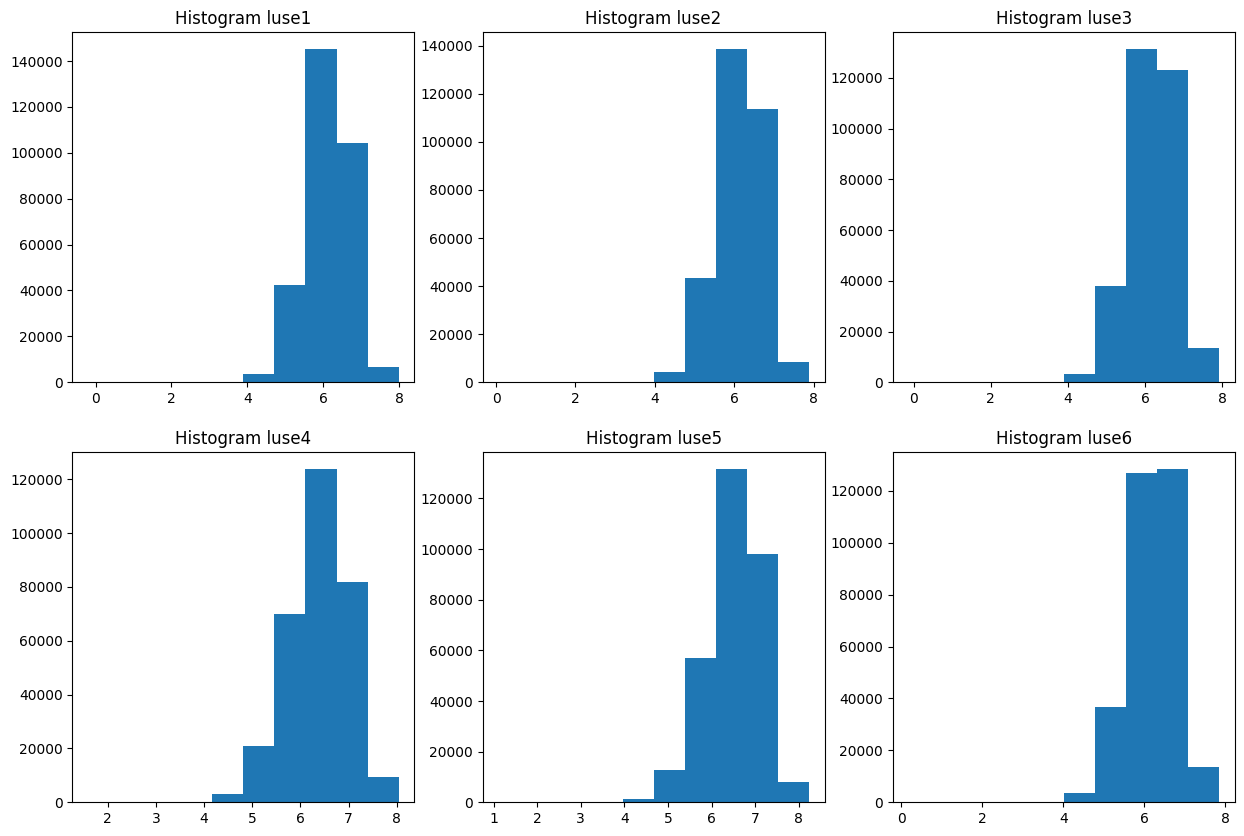

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df['luse1'])
plt.title('Histogram luse1')

plt.subplot(2,3,2)
plt.hist(df['luse2'])
plt.title('Histogram luse2')

plt.subplot(2,3,3)
plt.hist(df['luse3'])
plt.title('Histogram luse3')

plt.subplot(2,3,4)
plt.hist(df['luse4'])
plt.title('Histogram luse4')

plt.subplot(2,3,5)
plt.hist(df['luse5'])
plt.title('Histogram luse5')

plt.subplot(2,3,6)
plt.hist(df['luse6'])
plt.title('Histogram luse6')

plt.show()

In [27]:
df['luse1'].fillna(df['luse1'].mean(), inplace = True)
print(df['luse1'].isna().mean())
df['luse2'].fillna(df['luse2'].mean(), inplace = True)
print(df['luse2'].isna().mean())
df['luse3'].fillna(df['luse3'].mean(), inplace = True)
print(df['luse3'].isna().mean())
df['luse4'].fillna(df['luse4'].mean(), inplace = True)
print(df['luse4'].isna().mean())
df['luse5'].fillna(df['luse5'].mean(), inplace = True)
print(df['luse5'].isna().mean())
df['luse6'].fillna(df['luse6'].mean(), inplace = True)
print(df['luse6'].isna().mean())

0.0
0.0
0.0
0.0
0.0
0.0


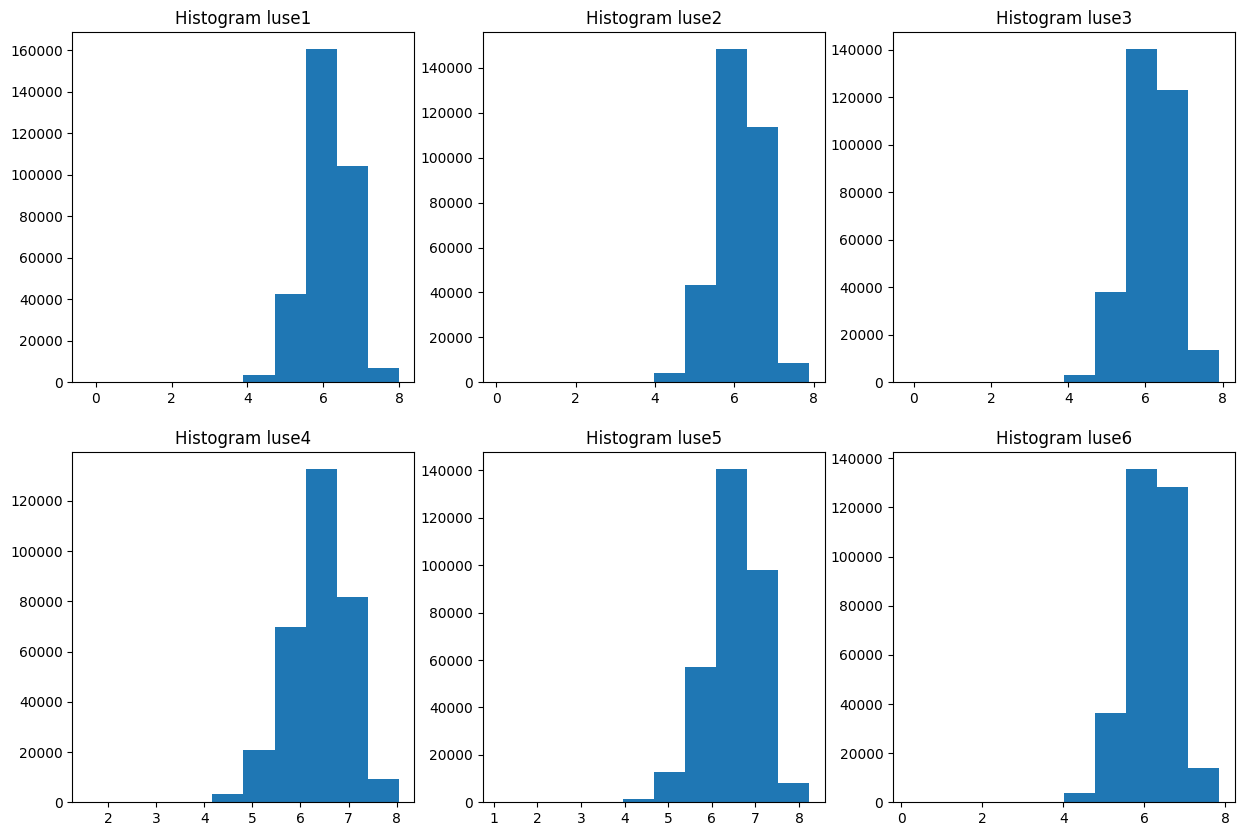

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df['luse1'])
plt.title('Histogram luse1')

plt.subplot(2,3,2)
plt.hist(df['luse2'])
plt.title('Histogram luse2')

plt.subplot(2,3,3)
plt.hist(df['luse3'])
plt.title('Histogram luse3')

plt.subplot(2,3,4)
plt.hist(df['luse4'])
plt.title('Histogram luse4')

plt.subplot(2,3,5)
plt.hist(df['luse5'])
plt.title('Histogram luse5')

plt.subplot(2,3,6)
plt.hist(df['luse6'])
plt.title('Histogram luse6')

plt.show()

# Income

    The income columnsv(2-9) are the one hot encoding of the income intervals. So, they contain discret data (0, 1) and only one column can have value 1 for the one row (household can be attached to only one income interval). 
    1. Check if a row contains missing data for the one of the income columns, remaining columns (8) are missing too
    2. Generate a new column with reverse engineered income intervals and calculate the median of the column which will be used to replace missing values

In [29]:
income_check_na = zip(
    df.income2.isna(), 
    df.income3.isna(),
    df.income4.isna(),
    df.income5.isna(), 
    df.income6.isna(),
    df.income7.isna(),
    df.income8.isna(),
    df.income9.isna()
)



This demonstrates that when one of the columns is missing, others are missing too

In [30]:
{
    sum(row)
    for row in income_check_na
}

{0, 8}

In [31]:
import re
df["income"] = None

In [32]:
for idx, row in df.iterrows():
    income_range = [
        int(re.sub("income", "", key))
        for key, value in row.items()
        if "income" in key and value == 1.0
    ]
    df.at[idx, "income"] = 0 if not income_range else income_range[0]

In [33]:

median_income = df[df["income"] != 0].income.median()

Median value for the income interval is 6. So, NAs will be replaced with 1 for the column income6 and with 0 for the other income columns

In [34]:
df.income2.fillna(0, inplace=True)
df.income3.fillna(0, inplace=True)
df.income4.fillna(0, inplace=True)
df.income5.fillna(0, inplace=True)
df.income6.fillna(1, inplace=True)
df.income7.fillna(0, inplace=True)
df.income8.fillna(0, inplace=True)
df.income9.fillna(0, inplace=True)

# Size
    ~30% of the size column is missing, so standard methods for this column will not be suitable. Maybe, missing values for this column can be estimated by creating a model using hsize and lusage columns

In [35]:
df["size"].isna().mean()

0.29446329813976874

In [36]:
df.isnull().mean()

hh_id               0.000000
year                0.000000
month               0.000000
zipcode             0.000000
mozip               0.000000
lusage              0.000000
luse1               0.000000
luse2               0.000000
luse3               0.000000
luse4               0.000000
luse5               0.000000
luse6               0.000000
children            0.000000
hhsize2             0.000000
hhsize3             0.000000
hhsize4             0.000000
hhsize5             0.000000
hhsize5plus         0.000000
income2             0.000000
income3             0.000000
income4             0.000000
income5             0.000000
income6             0.000000
income7             0.000000
income8             0.000000
income9             0.000000
owner               0.000000
size                0.294463
calculated_mozip    0.000000
income              0.000000
dtype: float64